# Fuel Efficiency Analysis

## Random Forest (Student)

In [1]:
# load the packages
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [2]:
# make a function to split the data into a training set and a validation set
test_train_split = function(data, test_size=.25){
    
    # the the number of observations in the data
    n_obs = dim(data)[1]
    
    # find the number of training observations by rounding up
    n_train_obs = ceiling(n_obs * (1 - test_size))
    
    # get the train indexes
    train_idx = sample(n_obs, n_train_obs)
    
    # split the data
    train = data[train_idx, ]
    test = data[-train_idx, ]

    # return the result
    result = list(train, test)
    return(result)
}

In [3]:
# write a function to calculate the MSE
calc_MSE = function (model, data){
    return (
        mean(
            (data$mpg - predict(model, data)) ^ 2
        )
    )
}

In [4]:
# read in the cleaned ISLR Auto dataset cleaned in 10-ins_best_subset
auto = read.csv("../resources/ISLR_auto_clean.csv", row.names=1)

In [5]:
# split the data
set.seed(1)
result = test_train_split(auto)
train = data.frame(result[1])
test = data.frame(result[2])

In [6]:
dim(train)[2]

[1] 8

In [7]:
# train and test a bagged tree estimator
set.seed(1)

rf_bag = randomForest(
    mpg ~ .,
    data=train,
    mtry=dim(train)[2] - 1,
    importance=TRUE
)

rf_bag
summary(rf_bag)
mean((predict(rf_bag, test) - test$mpg)^2)


Call:
 randomForest(formula = mpg ~ ., data = train, mtry = dim(train)[2] -      1, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 7

          Mean of squared residuals: 8.183582
                    % Var explained: 85.46

                Length Class  Mode     
call              5    -none- call     
type              1    -none- character
predicted       293    -none- numeric  
mse             500    -none- numeric  
rsq             500    -none- numeric  
oob.times       293    -none- numeric  
importance       14    -none- numeric  
importanceSD      7    -none- numeric  
localImportance   0    -none- NULL     
proximity         0    -none- NULL     
ntree             1    -none- numeric  
mtry              1    -none- numeric  
forest           11    -none- list     
coefs             0    -none- NULL     
y               293    -none- numeric  
test              0    -none- NULL     
inbag             0    -none- NULL     
terms             3    terms  call     

[1] 6.980267

In [8]:
# train and test a random forest
set.seed(1)
rf = randomForest(
    mpg ~ .,
    data=train,
    mtry=3,
    importance=TRUE
)
rf
summary(rf)
mean((predict(rf, test) - test$mpg)^2)


Call:
 randomForest(formula = mpg ~ ., data = train, mtry = 3, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 3

          Mean of squared residuals: 8.098501
                    % Var explained: 85.61

                Length Class  Mode     
call              5    -none- call     
type              1    -none- character
predicted       293    -none- numeric  
mse             500    -none- numeric  
rsq             500    -none- numeric  
oob.times       293    -none- numeric  
importance       14    -none- numeric  
importanceSD      7    -none- numeric  
localImportance   0    -none- NULL     
proximity         0    -none- NULL     
ntree             1    -none- numeric  
mtry              1    -none- numeric  
forest           11    -none- list     
coefs             0    -none- NULL     
y               293    -none- numeric  
test              0    -none- NULL     
inbag             0    -none- NULL     
terms             3    terms  call     

[1] 6.942384

In [9]:
# get test error vs mtry

n_predictors = dim(train)[2] - 1

mse_vs_mtry = rep(0, n_predictors)

for (i in 1:n_predictors){
    
    rf = randomForest(
        mpg ~ .,
        data=train,
        mtry=i,
        importance=TRUE
    )
    
    mse_vs_mtry[i] = calc_MSE(rf, test)
}

[1] 9.787413 7.013057 6.819636 6.784256 6.680342 6.799167 6.920926

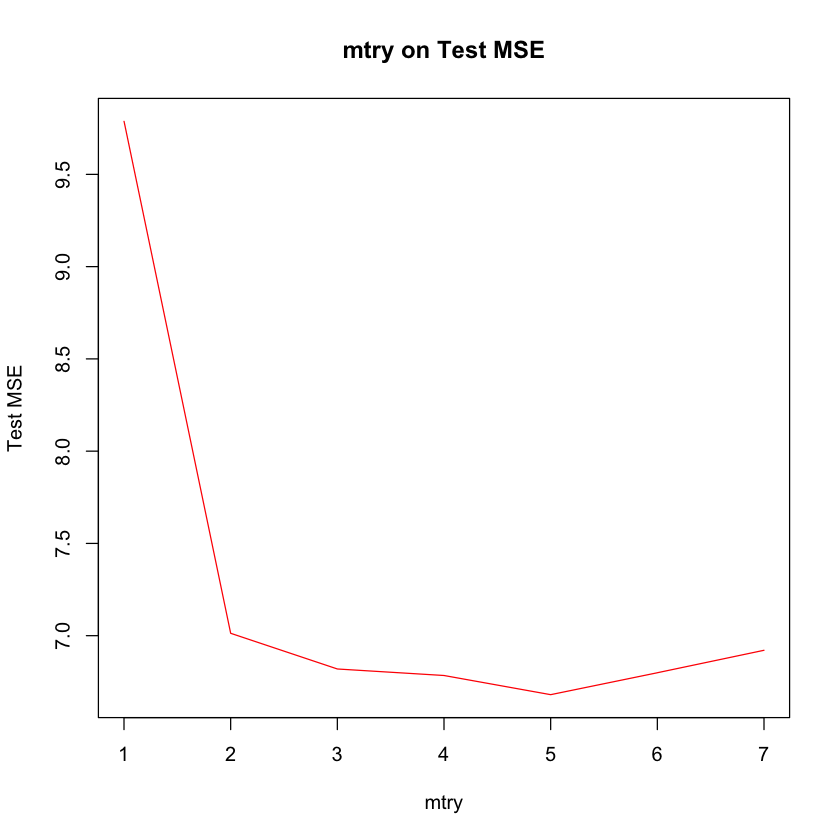

In [10]:
# show and plot test error vs mtry

mse_vs_mtry

plot(
    mse_vs_mtry,
    main="mtry on Test MSE",
    xlab="mtry",
    ylab="Test MSE",
    type="l",
    col="red"
)